## Actividad 3.1 

Bernardo Quintana López 

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy.special as special 
from scipy.optimize import curve_fit 
import seaborn as sns 
from sklearn.metrics import r2_score

In [4]:
#Cargamos los datos
data = pd.read_csv('LondonLimpio.csv')
data

,Unnamed: 0,last_scraped,source,host_name,host_since,host_location,host_is_superhost,host_neighbourhood,host_has_profile_pic,host_identity_verified,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,reviews_per_month,host_acceptance_rate,host_response_rate
0,0,12/12/24,city scrape,Boris,29/08/10,"London, United Kingdom",f,Hammersmith,t,t,...,4.880000,4.790000,4.92000,4.710000,11.0,9.0,1.0,0.840000,0.950000,0.990000
1,1,12/12/24,city scrape,Thomas,05/01/11,"Hamilton Parish, Bermuda",Desconocido,Mid-Beach,t,t,...,4.800000,4.740000,4.63000,4.510000,1.0,1.0,0.0,1.050000,1.000000,1.000000
2,2,12/12/24,city scrape,Boris,29/08/10,"London, United Kingdom",f,Hammersmith,t,t,...,4.870000,4.780000,4.91000,4.600000,11.0,9.0,1.0,1.060000,0.950000,0.990000
3,3,11/12/24,city scrape,Boris,29/08/10,"London, United Kingdom",f,Hammersmith,t,t,...,4.870000,4.770000,4.92000,4.670000,11.0,9.0,1.0,1.100000,0.950000,0.990000
4,4,11/12/24,city scrape,Alda,13/01/11,"London, United Kingdom",f,Desconocido,t,t,...,4.620000,4.850000,4.62000,4.230000,1.0,0.0,1.0,0.090000,0.821292,0.918403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95139,95139,12/12/24,city scrape,Anastasiia,15/02/22,Desconocido,f,Desconocido,f,t,...,4.794925,4.819357,4.73376,4.623557,1.0,1.0,0.0,1.015615,0.821292,0.918403
95140,95140,11/12/24,city scrape,Susan,09/12/15,"London, United Kingdom",f,Desconocido,t,t,...,4.794925,4.819357,4.73376,4.623557,1.0,1.0,0.0,1.015615,0.900000,0.918403
95141,95141,12/12/24,city scrape,Steve,22/05/17,"London, United Kingdom",f,Desconocido,t,t,...,4.794925,4.819357,4.73376,4.623557,2.8,0.0,0.4,1.015615,0.970000,1.000000
95142,95142,11/12/24,city scrape,Ursula,31/03/19,"England, United Kingdom",f,Desconocido,f,f,...,4.794925,4.819357,4.73376,4.623557,1.0,0.0,1.0,1.015615,0.821292,0.918403


In [5]:
valores_nulos=data.isnull().sum()
valores_nulos

Unnamed: 0                                      0
last_scraped                                    0
source                                          0
host_name                                       0
host_since                                      0
host_location                                   0
host_is_superhost                               0
host_neighbourhood                              0
host_has_profile_pic                            0
host_identity_verified                          0
neighbourhood                                   0
property_type                                   0
room_type                                       0
has_availability                                0
first_review                                    0
last_review                                     0
instant_bookable                                0
id                                              0
host_id                                         0
host_total_listings_count                       0


In [7]:
columnas_deseadas = [
    'host_response_rate',
    'host_acceptance_rate',
    'host_total_listings_count',
    'accommodates',
    'reviews_per_month',
    'price',
]

df_filtrado = data[columnas_deseadas]

In [10]:
corr_factors = df_filtrado.corr().dropna(how='all', axis=0).dropna(how='all', axis=1)
corr_factors

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,reviews_per_month,price
host_response_rate,1.000000,0.343017,0.181334,0.089992,0.190736,-0.229096
host_acceptance_rate,0.343017,1.000000,0.237613,0.122264,0.167406,-0.095870
host_total_listings_count,0.181334,0.237613,1.000000,0.105837,0.098283,-0.061093
accommodates,0.089992,0.122264,0.105837,1.000000,0.028429,0.363550
reviews_per_month,0.190736,0.167406,0.098283,0.028429,1.000000,-0.139430
price,-0.229096,-0.095870,-0.061093,0.363550,-0.139430,1.000000


In [11]:
corr_factors1 = abs(corr_factors)
corr_factors1

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,reviews_per_month,price
host_response_rate,1.000000,0.343017,0.181334,0.089992,0.190736,0.229096
host_acceptance_rate,0.343017,1.000000,0.237613,0.122264,0.167406,0.095870
host_total_listings_count,0.181334,0.237613,1.000000,0.105837,0.098283,0.061093
accommodates,0.089992,0.122264,0.105837,1.000000,0.028429,0.363550
reviews_per_month,0.190736,0.167406,0.098283,0.028429,1.000000,0.139430
price,0.229096,0.095870,0.061093,0.363550,0.139430,1.000000


In [67]:
r_squared_matrix = df_filtrado.corr() ** 2
r_squared_matrix = r_squared_matrix.dropna(how='all', axis=0).dropna(how='all', axis=1)
r_squared_matrix


,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,reviews_per_month,price
host_response_rate,1.000000,0.117661,0.032882,0.008099,0.036380,0.052485
host_acceptance_rate,0.117661,1.000000,0.056460,0.014948,0.028025,0.009191
host_total_listings_count,0.032882,0.056460,1.000000,0.011201,0.009660,0.003732
accommodates,0.008099,0.014948,0.011201,1.000000,0.000808,0.132169
reviews_per_month,0.036380,0.028025,0.009660,0.000808,1.000000,0.019441
price,0.052485,0.009191,0.003732,0.132169,0.019441,1.000000


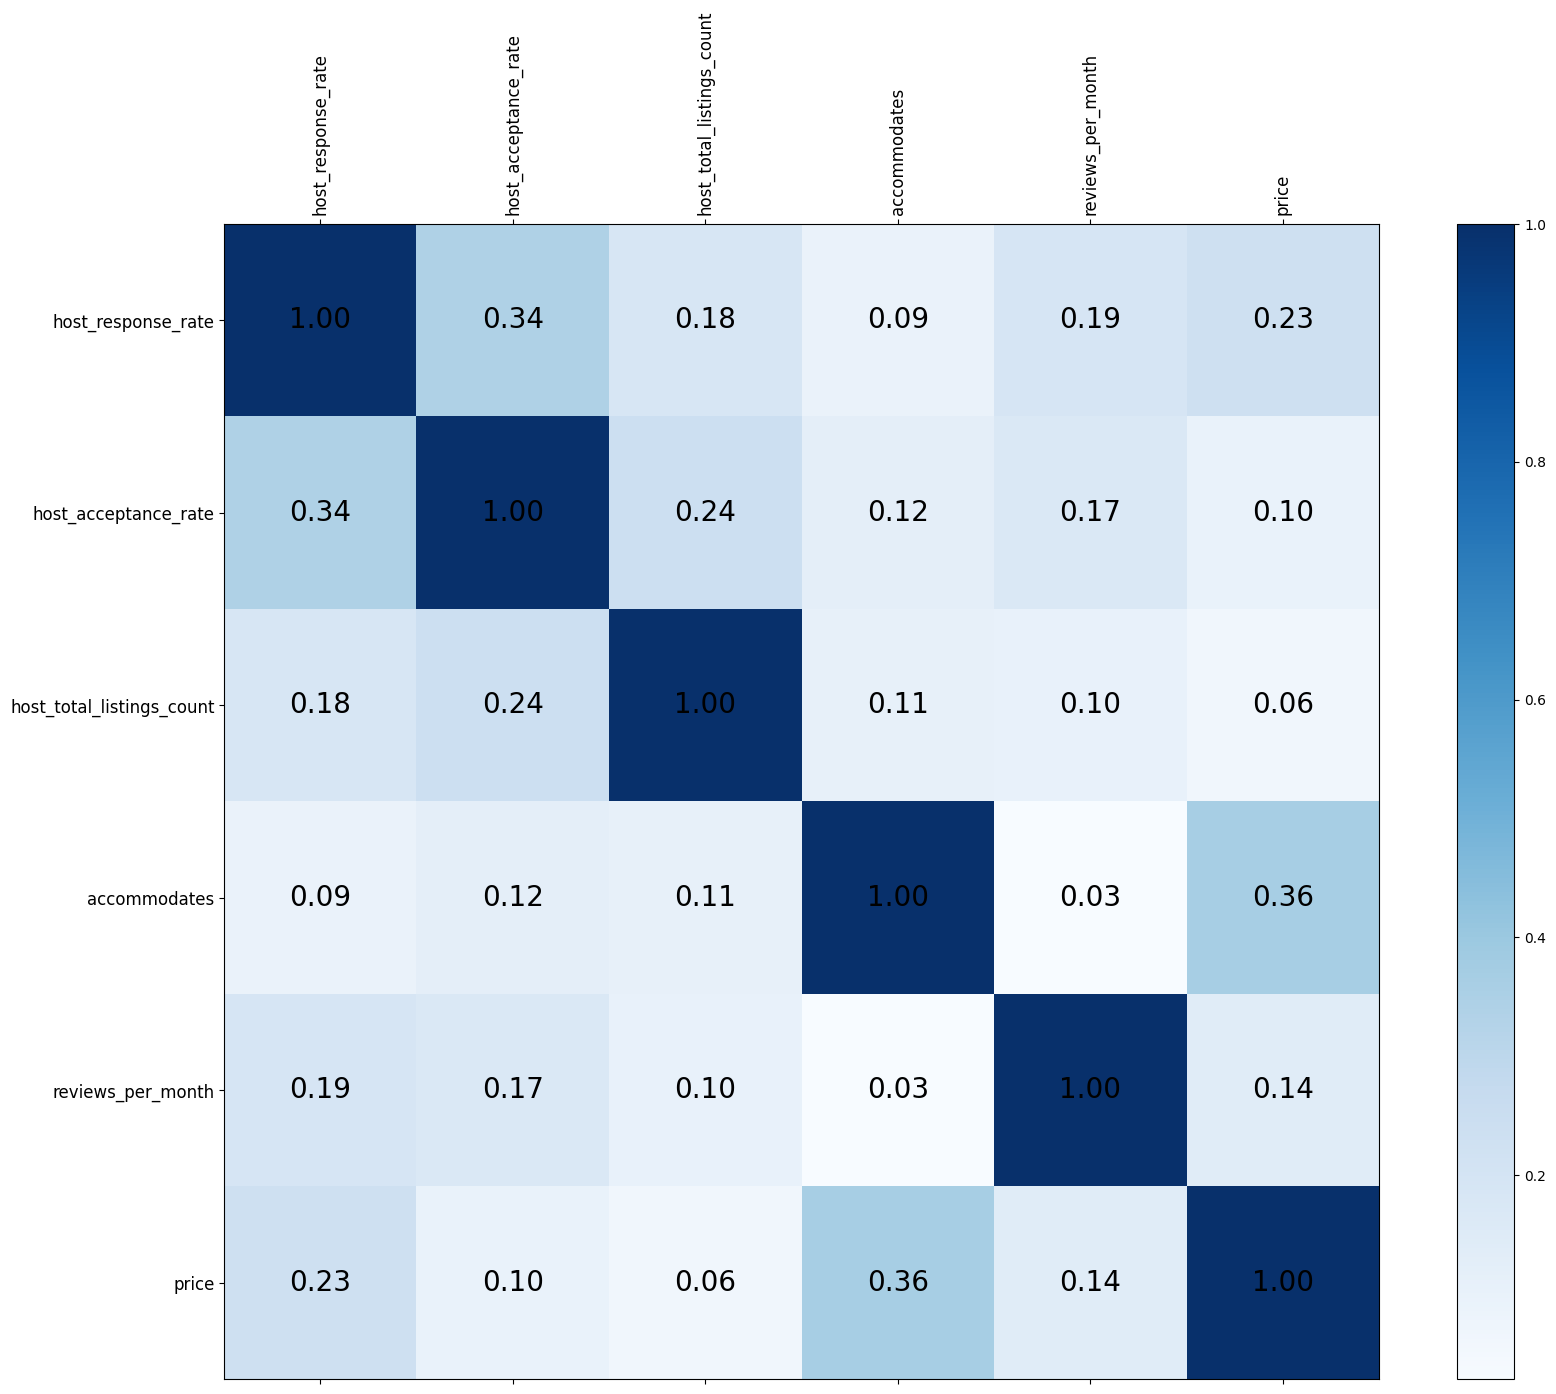

In [ ]:
fig, ax = plt.subplots(figsize=(20, 15))
cax = ax.matshow(corr_factors1, cmap="Blues")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(corr_factors1.shape[0]):
    for j in range(corr_factors1.shape[1]):
        ax.text(j, i, f"{corr_factors1.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(corr_factors1.columns)), corr_factors1.columns, rotation=90, fontsize=12)
plt.yticks(range(len(corr_factors1.index)), corr_factors1.index, fontsize=12)
plt.show()

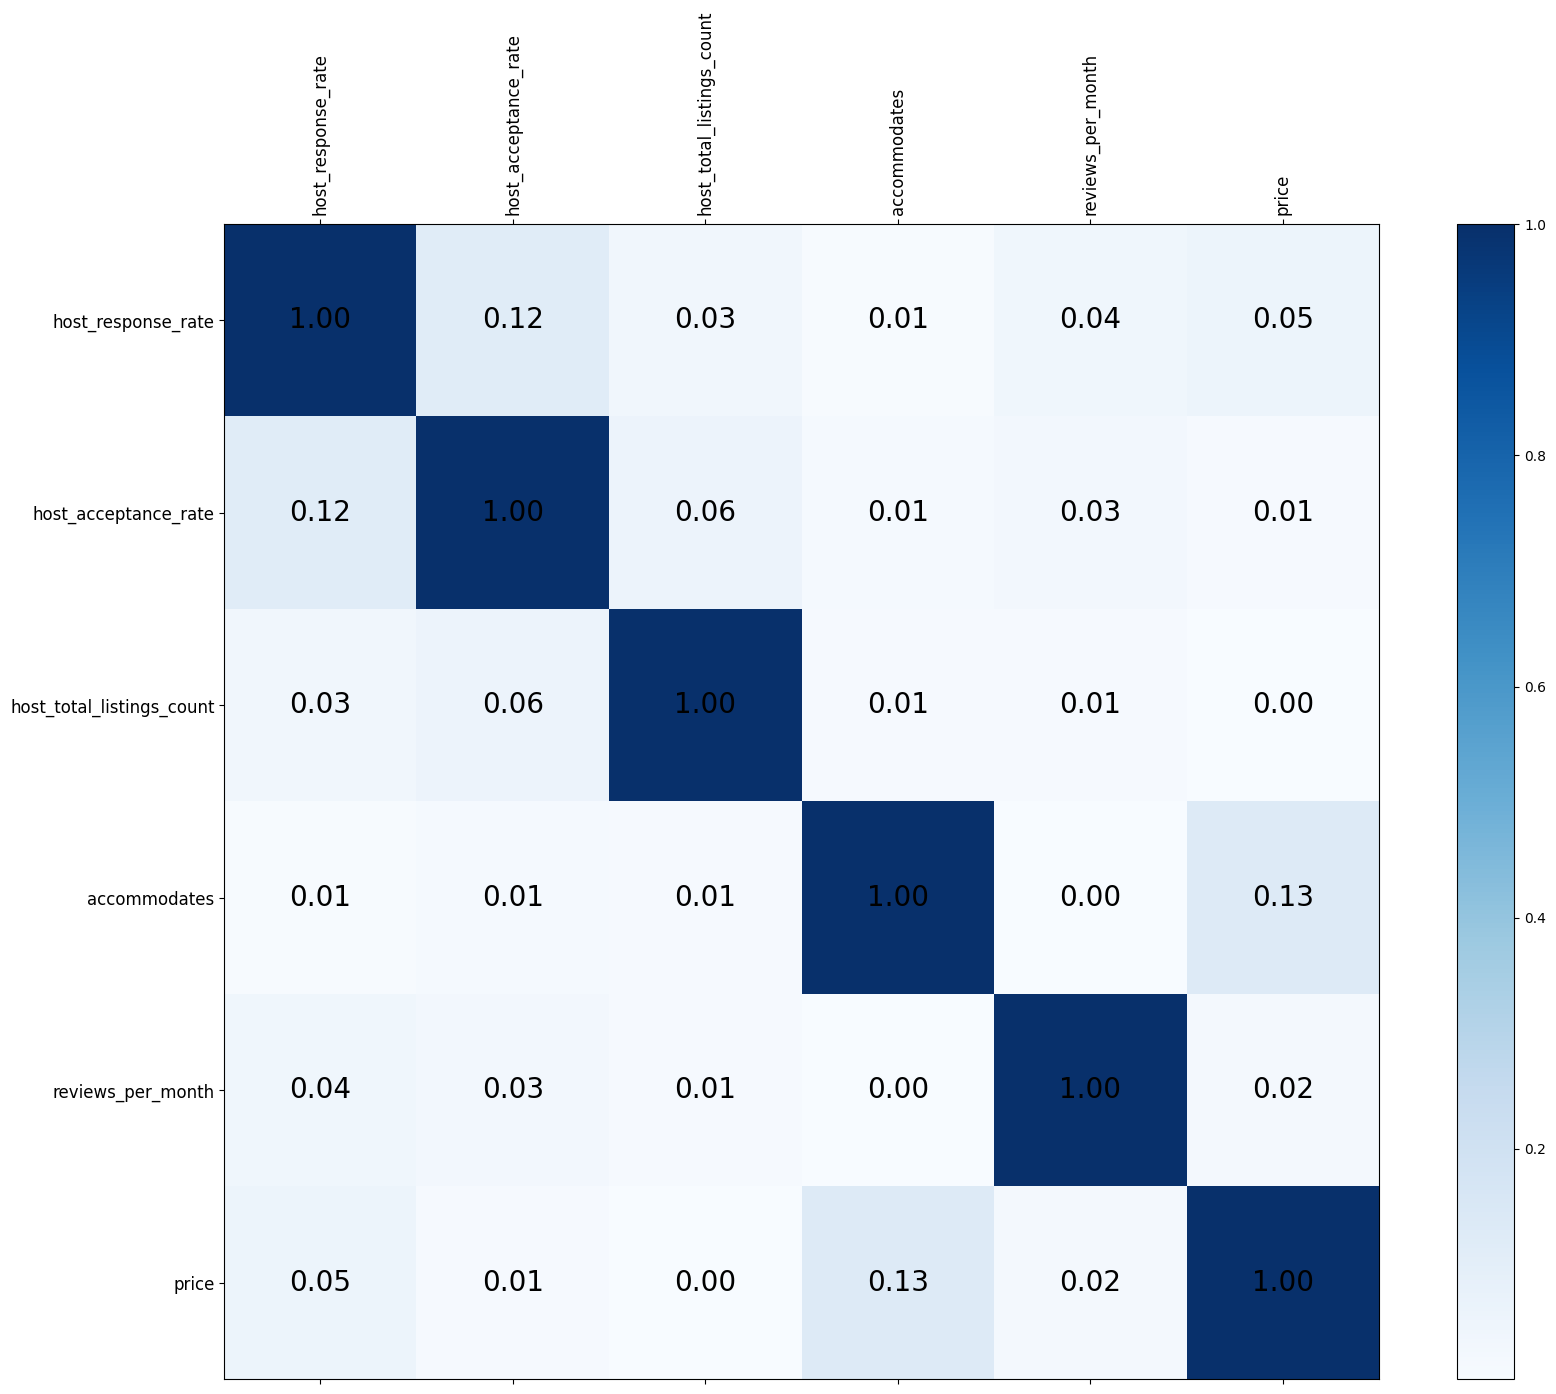

In [66]:
fig, ax = plt.subplots(figsize=(20, 15))
cax = ax.matshow(r_squared_matrix, cmap="Blues")
fig.colorbar(cax)

# Añadir anotaciones manualmente
for i in range(r_squared_matrix.shape[0]):
    for j in range(r_squared_matrix.shape[1]):
        ax.text(j, i, f"{r_squared_matrix.iloc[i, j]:.2f}", 
               ha="center", va="center", fontsize=20)

plt.xticks(range(len(r_squared_matrix.columns)), r_squared_matrix.columns, rotation=90, fontsize=12)
plt.yticks(range(len(r_squared_matrix.index)), r_squared_matrix.index, fontsize=12)
plt.show()

## Host response rate

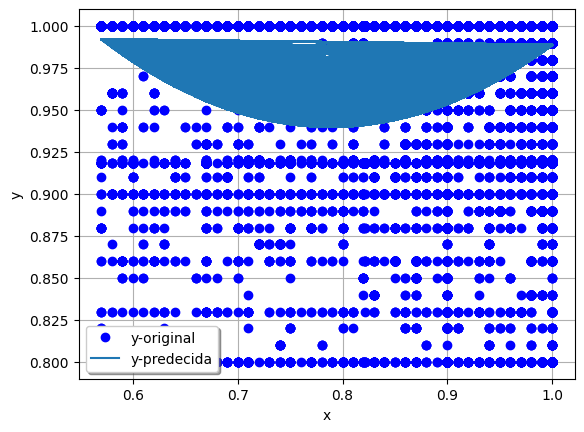

0.20041357340887445
0.4476757458349452


In [13]:
Vars_Indep= df_filtrado[['host_acceptance_rate']]
Var_Dep= df_filtrado['host_response_rate']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*x**2 + b*x + c 

parametros, covs= curve_fit(func1, df_filtrado['host_acceptance_rate'], df_filtrado['host_response_rate'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

/var/folders/94/xjf3jcy17bl_0r1wdp5btmhr0000gn/T/ipykernel_40213/172132262.py:10: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, df_filtrado['host_acceptance_rate'], df_filtrado['host_response_rate'])


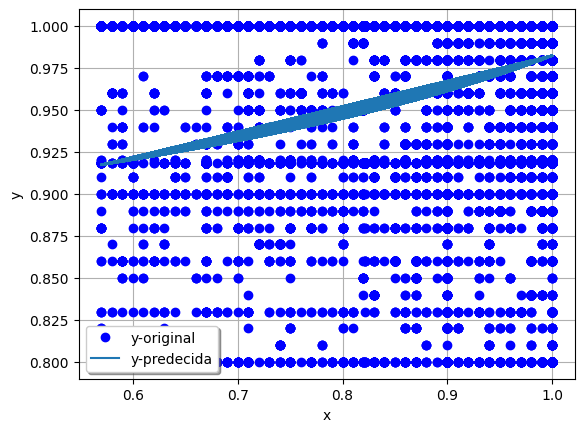

0.13951556356568384
0.3735178222865461


In [33]:
Vars_Indep= df_filtrado[['host_acceptance_rate']]
Var_Dep= df_filtrado['host_response_rate']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*np.tan(x) + b 

parametros, covs= curve_fit(func1, df_filtrado['host_acceptance_rate'], df_filtrado['host_response_rate'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

## Host acceptance rate

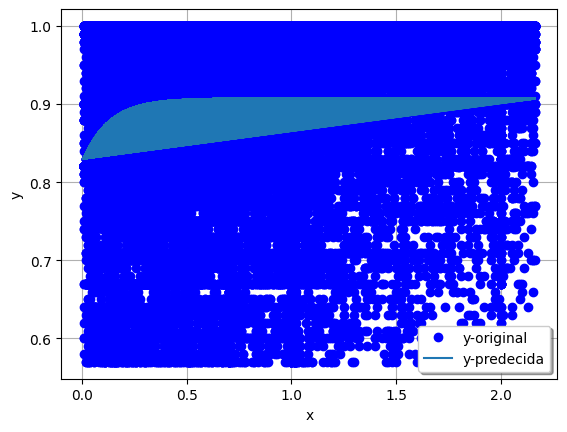

0.048130664159056646
0.21938701912158942


In [54]:
Vars_Indep= df_filtrado[['reviews_per_month']]
Var_Dep= df_filtrado['host_acceptance_rate']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*np.exp(-b*x) + c 

parametros, covs= curve_fit(func1, df_filtrado['reviews_per_month'], df_filtrado['host_acceptance_rate'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

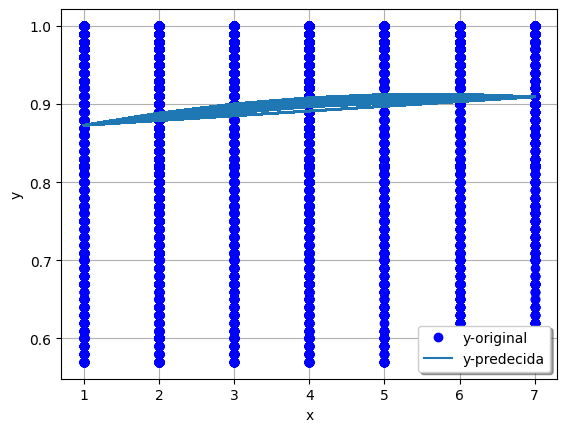

0.01729830072153904
0.13152300453357596


In [64]:
Vars_Indep= df_filtrado[['accommodates']]
Var_Dep= df_filtrado['host_acceptance_rate']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*x**2 + b*x + c

parametros, covs= curve_fit(func1, df_filtrado['accommodates'], df_filtrado['host_acceptance_rate'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

## Host total listings count

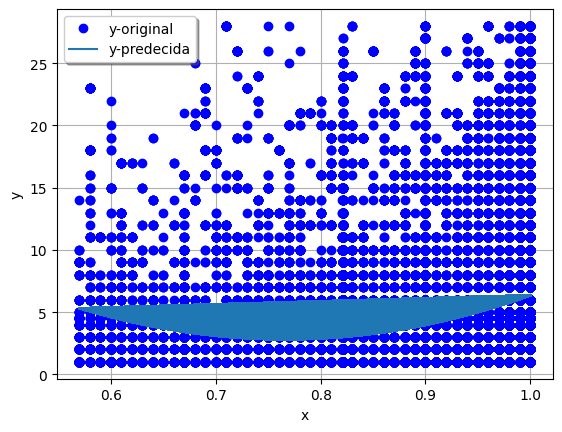

0.07991713624837704
0.2826961907213768


In [26]:
Vars_Indep= df_filtrado[['host_acceptance_rate']]
Var_Dep= df_filtrado['host_total_listings_count']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*x**2 + b*x + c 

parametros, covs= curve_fit(func1, df_filtrado['host_acceptance_rate'], df_filtrado['host_total_listings_count'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

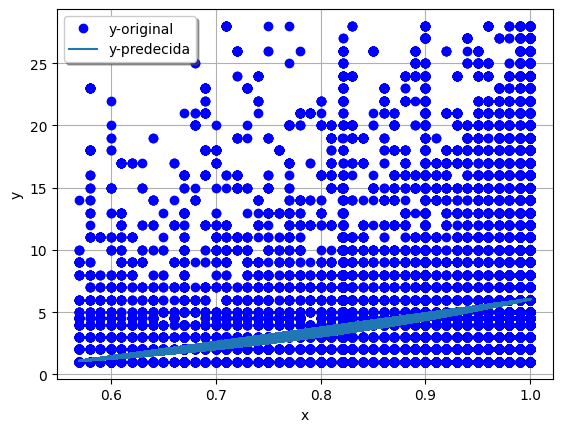

0.0654110208496469
0.25575578360937784


In [ ]:
Vars_Indep= df_filtrado[['host_acceptance_rate']]
Var_Dep= df_filtrado['host_total_listings_count']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*np.tan(x) + b 

parametros, covs= curve_fit(func1, df_filtrado['host_acceptance_rate'], df_filtrado['host_total_listings_count'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

## Accommodates

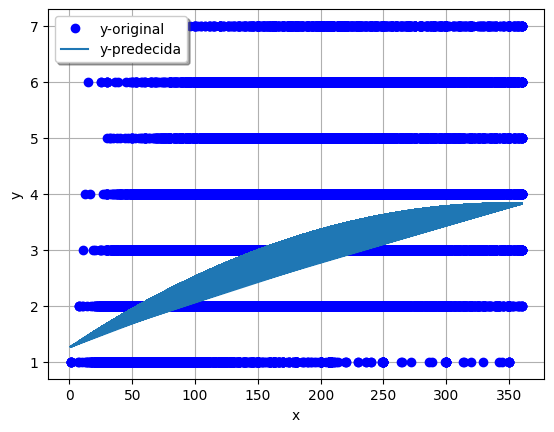

0.1391430602295357
0.3730188470165224


In [27]:
Vars_Indep= df_filtrado[['price']]
Var_Dep= df_filtrado['accommodates']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*x**2 + b*x + c 

parametros, covs= curve_fit(func1, df_filtrado['price'], df_filtrado['accommodates'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

/var/folders/94/xjf3jcy17bl_0r1wdp5btmhr0000gn/T/ipykernel_40213/3900498539.py:10: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, df_filtrado['price'], df_filtrado['accommodates'])


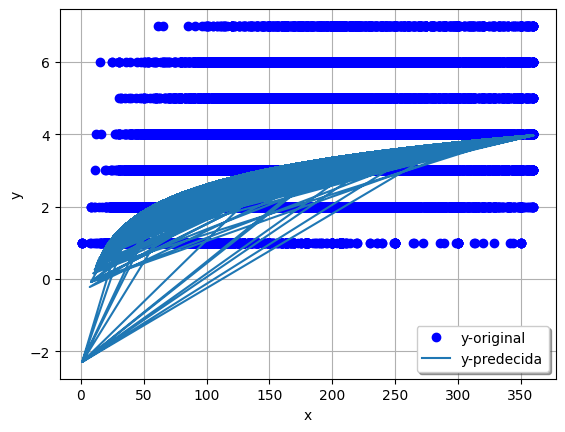

0.14797701556521203
0.38467780747687025


In [40]:
Vars_Indep= df_filtrado[['price']]
Var_Dep= df_filtrado['accommodates']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*np.log(x) + b

parametros, covs= curve_fit(func1, df_filtrado['price'], df_filtrado['accommodates'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

## Reviews per month

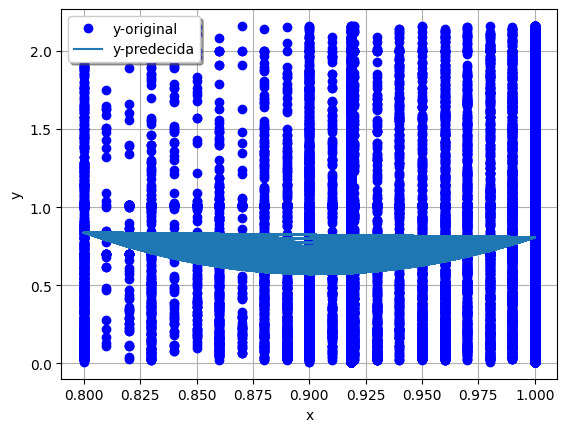

0.0515991870248661
0.22715454436322885


In [28]:
Vars_Indep= df_filtrado[['host_response_rate']]
Var_Dep= df_filtrado['reviews_per_month']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*x**2 + b*x + c 

parametros, covs= curve_fit(func1, df_filtrado['host_response_rate'], df_filtrado['reviews_per_month'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

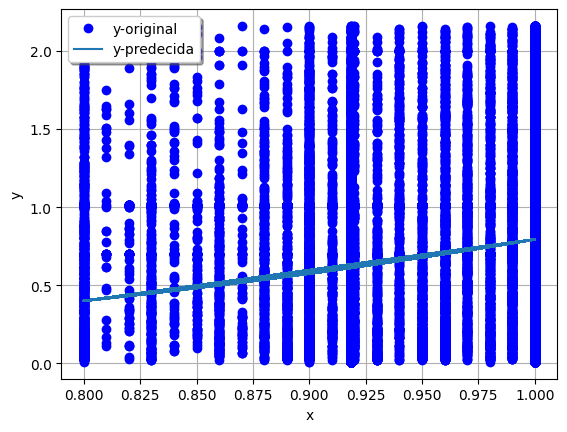

0.03887739889145403
0.19717352482383133


In [43]:
Vars_Indep= df_filtrado[['host_response_rate']]
Var_Dep= df_filtrado['reviews_per_month']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return (a*x**2 + b)/ c*x

parametros, covs= curve_fit(func1, df_filtrado['host_response_rate'], df_filtrado['reviews_per_month'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

## Price

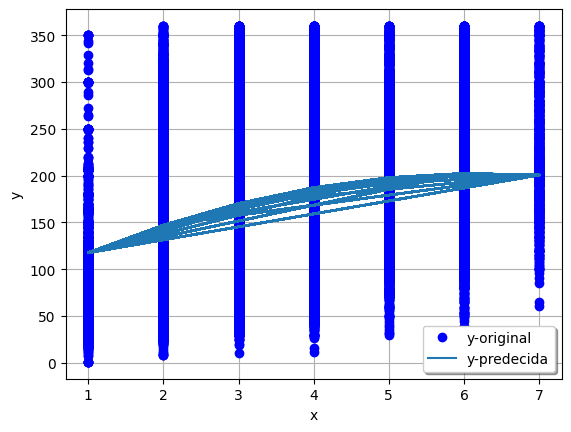

0.14448303353111236
0.38010923894469123


In [29]:
Vars_Indep= df_filtrado[['accommodates']]
Var_Dep= df_filtrado['price']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*x**2 + b*x + c 

parametros, covs= curve_fit(func1, df_filtrado['accommodates'], df_filtrado['price'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)

/var/folders/94/xjf3jcy17bl_0r1wdp5btmhr0000gn/T/ipykernel_40213/1991466172.py:10: OptimizeWarning: Covariance of the parameters could not be estimated
  parametros, covs= curve_fit(func1, df_filtrado['accommodates'], df_filtrado['price'])


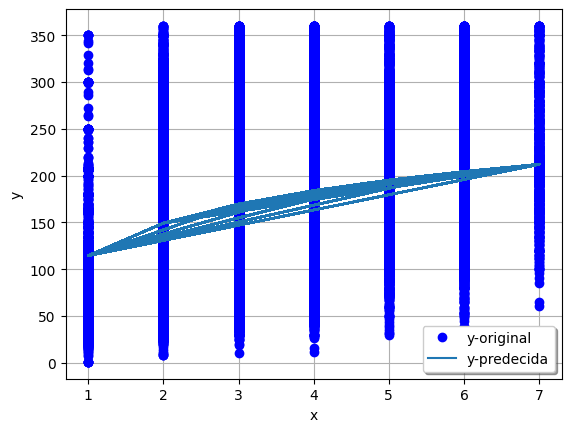

0.1438690990666569
0.37930080288164025


In [52]:
Vars_Indep= df_filtrado[['accommodates']]
Var_Dep= df_filtrado['price']

x = Vars_Indep
y = Var_Dep

def func1(x, a, b, c):
    return a*np.log(x) + b

parametros, covs= curve_fit(func1, df_filtrado['accommodates'], df_filtrado['price'])

y_pred = func1(x, *parametros)

plt.plot(x, y, 'bo', label="y-original")
plt.plot(x, y_pred, label="y-predecida")
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='best', fancybox=True, shadow=True)
plt.grid(True)
plt.show()

#Calculamos el coeficiente de determinación del modelo
R2_Modelo1 = r2_score(y, y_pred) 
print(R2_Modelo1)

#Calculamos el coeficiente de correlación del modelo
R= np.sqrt(R2_Modelo1)
print(R)